In [2]:
%pip install paddlenlp==2.4.3
%pip install datasets
!pip install paddlepaddle
#!pip install protobuf==3.20.3

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 17.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 22.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 39.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 22.8 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
import paddlenlp
from datasets import load_dataset

# 利用datasets加载数据集
train_path = "train.json"
dev_path = "dev.json"
test_path = "test.json"
dataset = load_dataset("json", data_files={"train":train_path, "dev":dev_path, "test":test_path})

# 打印训练集中的前3条数据
print(dataset["test"][:3])

Generating train split: 18054 examples [00:00, 313789.37 examples/s]
Generating dev split: 1000 examples [00:00, 212197.92 examples/s]
Generating test split: 1944 examples [00:00, 344591.62 examples/s]

{'text': ['共 同 创 造 美 好 的 新 世 纪 — — 二 ○ ○ 一 年 新 年 贺 词', '( 二 ○ ○ ○ 年 十 二 月 三 十 一 日 ) ( 附 图 片 1 张 )', '女 士 们 , 先 生 们 , 同 志 们 , 朋 友 们 :'], 'label': ['B E B E B E S S B E B E B M M M E B E B E', 'S B M M M E B M E B M M E S S S B E S S S', 'B E S S B E S S B E S S B E S S']}


In [4]:
from paddlenlp.transformers import BertTokenizer
# 初始化tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

# 使用tokenizer将数据转换成对应特征形式
inputs = tokenizer(text='中文分词是一项重要的自然语言处理领域任务')
print(inputs)

(…)/models/bert/bert-base-chinese-vocab.txt: 100%|██████████| 110k/110k [00:00<00:00, 998kB/s] 
[2025-03-31 21:47:24,571] [    INFO] - tokenizer config file saved in /root/.paddlenlp/models/bert-base-chinese/tokenizer_config.json
[2025-03-31 21:47:24,573] [    INFO] - Special tokens file saved in /root/.paddlenlp/models/bert-base-chinese/special_tokens_map.json


{'input_ids': [101, 704, 3152, 1146, 6404, 3221, 671, 7555, 7028, 6206, 4638, 5632, 4197, 6427, 6241, 1905, 4415, 7566, 1818, 818, 1218, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [5]:
inputs = tokenizer('中文分词是一项重要的自然语言处理领域任务', return_length=True, max_seq_len=128, return_position_ids=True, return_offsets_mapping=True, return_attention_mask=True)
print(inputs)

{'input_ids': [101, 704, 3152, 1146, 6404, 3221, 671, 7555, 7028, 6206, 4638, 5632, 4197, 6427, 6241, 1905, 4415, 7566, 1818, 818, 1218, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'offset_mapping': [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (0, 0)], 'position_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'length': 22, 'seq_len': 22}


/root/miniconda3/envs/bert/lib/python3.9/site-packages/paddlenlp/transformers/tokenizer_utils_base.py:2327: FutureWarning: The `max_seq_len` argument is deprecated and will be removed in a future version, please use `max_length` instead.
  warnings.warn(
/root/miniconda3/envs/bert/lib/python3.9/site-packages/paddlenlp/transformers/tokenizer_utils_base.py:1899: UserWarning: Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
  warnings.warn(


In [6]:
# 对文本序列进行分词
tokens = tokenizer.tokenize('中文分词是一项重要的自然语言处理领域任务')
print(tokens)
# 将token转换为id
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)
# 将id转换为token
tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(tokens)
# 将token转换为字符串
text = tokenizer.convert_tokens_to_string(tokens)
print(text)

['中', '文', '分', '词', '是', '一', '项', '重', '要', '的', '自', '然', '语', '言', '处', '理', '领', '域', '任', '务']
[704, 3152, 1146, 6404, 3221, 671, 7555, 7028, 6206, 4638, 5632, 4197, 6427, 6241, 1905, 4415, 7566, 1818, 818, 1218]
['中', '文', '分', '词', '是', '一', '项', '重', '要', '的', '自', '然', '语', '言', '处', '理', '领', '域', '任', '务']
中 文 分 词 是 一 项 重 要 的 自 然 语 言 处 理 领 域 任 务


In [7]:
from paddlenlp.transformers import AutoTokenizer
# 初始化tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese')
print(tokenizer.__class__)

# 使用tokenizer将数据转换成对应特征形式
inputs = tokenizer(text='中文分词是一项重要的自然语言处理领域任务')
print(inputs)

[2025-03-31 21:47:27,720] [    INFO] - We are using (<class 'paddlenlp.transformers.bert.tokenizer.BertTokenizer'>, False) to load 'bert-base-chinese'.
[2025-03-31 21:47:27,741] [    INFO] - tokenizer config file saved in /root/.paddlenlp/models/bert-base-chinese/tokenizer_config.json
[2025-03-31 21:47:27,741] [    INFO] - Special tokens file saved in /root/.paddlenlp/models/bert-base-chinese/special_tokens_map.json


<class 'paddlenlp.transformers.bert.tokenizer.BertTokenizer'>
{'input_ids': [101, 704, 3152, 1146, 6404, 3221, 671, 7555, 7028, 6206, 4638, 5632, 4197, 6427, 6241, 1905, 4415, 7566, 1818, 818, 1218, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [8]:
from paddlenlp.transformers import AutoTokenizer

def convert_example_to_feature(example, tokenizer, label2id, max_seq_len=512, is_infer=False):
    """
    将输入样本转换成适合BERT模型的输入特征

    输入：
        - example: 单个输入样本
        - tokenizer: Bert模型的tokenizer实例
        - label2id: 用于将标签转为id的字典
        - max_seq_len: 模型处理文本的最大序列长度
        - is_infer: 是否为模型预测，对于预测数据，不会处理标签数据
    """
    
    # 利用tokenizer将输入数据转换成特征形式
    text = example["text"].strip().split(" ")
    encoded_inputs = tokenizer(text, max_seq_len=max_seq_len, is_split_into_words="token", return_length=True)

    # 处理带有标签的数据
    if not is_infer:
        label = [label2id[item] for item in example["label"].split(" ")][:max_seq_len-2]
        encoded_inputs["label"] = [label2id["O"]] + label + [label2id["O"]]
        #assert len(encoded_inputs["label"]) == len(encoded_inputs["input_ids"])

    return encoded_inputs

# 初始化tokenizer
model_name = "bert-base-chinese"
label2id = {"O":0, "B":1, "M":2, "E":3, "S":4}
tokenizer = AutoTokenizer.from_pretrained(model_name)

[2025-03-31 21:47:28,610] [    INFO] - We are using (<class 'paddlenlp.transformers.bert.tokenizer.BertTokenizer'>, False) to load 'bert-base-chinese'.
[2025-03-31 21:47:28,632] [    INFO] - tokenizer config file saved in /root/.paddlenlp/models/bert-base-chinese/tokenizer_config.json
[2025-03-31 21:47:28,633] [    INFO] - Special tokens file saved in /root/.paddlenlp/models/bert-base-chinese/special_tokens_map.json


In [9]:
# 展示一个样例
example = {"text":"钱 其 琛 访 问 德 班", "label":"S B E B E B E"}
features = convert_example_to_feature(example, tokenizer, label2id, max_seq_len=512, is_infer=False)
print(features)

{'input_ids': [101, 7178, 1071, 4422, 6393, 7309, 2548, 4408, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'length': 9, 'seq_len': 9, 'label': [0, 4, 1, 3, 1, 3, 1, 3, 0]}


In [10]:
from functools import partial

max_seq_len = 512
trans_fn = partial(convert_example_to_feature, tokenizer=tokenizer, label2id=label2id, max_seq_len=max_seq_len)

# 将输入数据训练集、验证集和测试集统一转换成特征形式
columns = ["text", "label"]
train_dataset = dataset["train"].map(trans_fn, batched=False, remove_columns=columns)
dev_dataset = dataset["dev"].map(trans_fn, batched=False, remove_columns=columns)
test_dataset = dataset["test"].map(trans_fn, batched=False, remove_columns=columns)

# 输出每个数据集中的样本数量
print("train_dataset:", len(train_dataset))
print("dev_dataset:", len(dev_dataset))
print("test_dataset:", len(test_dataset))

Map: 100%|██████████| 1944/1944 [00:04<00:00, 396.86 examples/s]

train_dataset: 18054
dev_dataset: 1000
test_dataset: 1944


In [11]:
import paddle

def collate_fn(batch_data, pad_token_id=0, pad_token_type_id=0, pad_label_id=0):
    """
    批量数据处理函数

    输入：
        - batch_data: 当前待处理的批量数据
        - pad_token_id: 对于token_id的填充占位符
        - pad_token_type_id: 对于token_type_id的填充占位符
        - pad_label_id: 对于label序列的填充占位符号
    """

    input_ids_list, token_type_ids_list, label_list = [], [], []
    max_len = 0
    for example in batch_data:
        input_ids, token_type_ids, label = example["input_ids"], example["token_type_ids"], example["label"]
        # 对各项数据进行文本填充
        input_ids_list.append(input_ids)
        token_type_ids_list.append(token_type_ids)
        label_list.append(label)
        # 保存序列最大长度
        max_len = max(max_len, len(input_ids))
    # 对数据序列进行填充至最大长度
    for i in range(len(input_ids_list)):
        cur_len = len(input_ids_list[i])
        input_ids_list[i] = input_ids_list[i] + [pad_token_id] * (max_len - cur_len)
        token_type_ids_list[i] = token_type_ids_list[i] + [pad_token_type_id] * (max_len - cur_len)
        label_list[i] = label_list[i] + [pad_label_id] * (max_len - cur_len)

    return paddle.to_tensor(input_ids_list),  paddle.to_tensor(token_type_ids_list), paddle.to_tensor(label_list)

In [12]:
from paddle.io import BatchSampler, DataLoader

batch_size= 16
train_sampler = BatchSampler(train_dataset, batch_size=batch_size, shuffle=True)
dev_sampler = BatchSampler(dev_dataset, batch_size=batch_size, shuffle=False)

train_loader = DataLoader(dataset=train_dataset, batch_sampler=train_sampler, collate_fn=collate_fn)
dev_loader = DataLoader(dataset=dev_dataset, batch_sampler=dev_sampler, collate_fn=collate_fn)
test_loader = DataLoader(dataset=test_dataset, batch_sampler=dev_sampler, collate_fn=collate_fn)

In [13]:
print(next(iter(train_loader)))

[Tensor(shape=[16, 512], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[101 , 6821, 763 , ..., 0   , 0   , 0   ],
        [101 , 1092, 704 , ..., 0   , 0   , 0   ],
        [101 , 3315, 2845, ..., 0   , 0   , 0   ],
        ...,
        [101 , 3152, 1265, ..., 0   , 0   , 0   ],
        [101 , 5018, 1282, ..., 0   , 0   , 0   ],
        [101 , 3330, 7188, ..., 0   , 0   , 0   ]]), Tensor(shape=[16, 512], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), Tensor(shape=[16, 512], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[0, 1, 3, ..., 0, 0, 0],
        [0, 1, 3, ..., 0, 0, 0],
        [0, 1, 3, ..., 0, 0, 0],
        ...,
        [0, 1, 3, ..., 0, 0, 0],
        [0, 1, 3, ..., 0, 0, 0],
        [0, 4, 1, ..., 0, 0, 0]])]


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/root/miniconda3/envs/bert/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/root/miniconda3/envs/bert/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/root/miniconda3/envs/bert/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/root/miniconda3/envs/bert/lib/python3.9/site-packages/paddle/io/dataloader/dataloader_iter.py", line 235, in _thread_loop
    batch = self._dataset_fetcher.fetch(
  File "/root/miniconda3/envs/bert/lib/python3.9/site-packages/paddle/io/dataloader/fetcher.py", line 86, in fetch
    data = self.collate_fn(data)
  File "/tmp/ipykernel_5330/2535150231.py", line 31, in collate_fn
  File "/root/miniconda3/envs/bert/lib/python3.9/site-packages/paddle/tensor/creation.py", line 781, in to_tensor
    return _to_tensor_non_static(data, dtype, place, s

In [14]:
from paddle.io import BatchSampler, DataLoader
from paddlenlp.data import DataCollatorForTokenClassification

batch_size= 16
train_sampler = BatchSampler(train_dataset, batch_size=batch_size, shuffle=True)
dev_sampler = BatchSampler(dev_dataset, batch_size=batch_size, shuffle=False)

# 使用预置的DataCollator
data_collator = DataCollatorForTokenClassification(tokenizer, label_pad_token_id=label2id["O"])
train_loader = DataLoader(dataset=train_dataset, batch_sampler=train_sampler, collate_fn=data_collator)
dev_loader = DataLoader(dataset=dev_dataset, batch_sampler=dev_sampler, collate_fn=data_collator)
test_loader = DataLoader(dataset=test_dataset, batch_sampler=dev_sampler, collate_fn=data_collator)

# 打印训练集中的第1个batch数据
print(next(iter(train_loader)))

{'input_ids': Tensor(shape=[16, 223], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[101 , 124 , 2476, ..., 0   , 0   , 0   ],
        [101 , 1762, 915 , ..., 5143, 511 , 102 ],
        [101 , 5869, 2456, ..., 0   , 0   , 0   ],
        ...,
        [101 , 113 , 3173, ..., 0   , 0   , 0   ],
        [101 , 3173, 1290, ..., 0   , 0   , 0   ],
        [101 , 3736, 3813, ..., 0   , 0   , 0   ]]), 'token_type_ids': Tensor(shape=[16, 223], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), 'length': Tensor(shape=[16], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [9  , 223, 30 , 48 , 21 , 8  , 92 , 10 , 86 , 8  , 3  , 14 , 14 , 13 ,
        165, 178]), 'seq_len': Tensor(shape=[16], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [9  , 223,

In [15]:
import paddle
import paddle.nn as nn

class BertForTokenClassification(nn.Layer):
    """
    BERT模型上层叠加线性层，用以对输入序列的token进行分类， 如NER任务
    
    输入:
        - bert: BERT模型的实例
        - num_classes: 分类的类别数，默认为2
        - dropout: 对于BERT输出向量的dropout概率，如果为None，则会使用BERT内部设置的hidden_dropout_prob
    """
    def __init__(self, bert, num_classes=2, dropout=None):
        super(BertForTokenClassification, self).__init__()
        self.num_classes = num_classes
        self.bert = bert
        self.dropout = nn.Dropout(dropout if dropout is not None else self.bert.config["hidden_dropout_prob"])
        self.classifier = nn.Linear(self.bert.config["hidden_size"], num_classes)

    def forward(self,
                input_ids,
                token_type_ids=None,
                position_ids=None,
                attention_mask=None):
        
        # 将输入传入BERT模型进行处理
        outputs = self.bert(input_ids,
                            token_type_ids=token_type_ids,
                            position_ids=position_ids,
                            attention_mask=attention_mask)

        # 获取输入序列对应的向量序列
        sequence_output = outputs[0]
        sequence_output = self.dropout(sequence_output)

        # 通过线性层将向量映射为词位标记的logits
        logits = self.classifier(sequence_output)

        return logits

In [16]:
from paddlenlp.transformers import BertForTokenClassification

# model_name: bert-base-chinese
model = BertForTokenClassification.from_pretrained(model_name, num_classes=5)

(…)sformers/bert/bert-base-chinese.pdparams: 100%|██████████| 476M/476M [00:09<00:00, 51.0MB/s] 
[2025-03-31 21:49:13,498] [    INFO] - Loading weights file from cache at /root/.paddlenlp/models/bert-base-chinese/model_state.pdparams
[2025-03-31 21:49:13,994] [    INFO] - Loaded weights file from disk, setting weights to model.
W0331 21:49:14.001384  5330 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 12.8, Runtime API Version: 11.8
W0331 21:49:14.006839  5330 gpu_resources.cc:149] device: 0, cuDNN Version: 8.1.
[2025-03-31 21:49:14,361] [ WARNING] - Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForTokenClassification: ['cls.predictions.decoder_bias', 'cls.predictions.decoder_weight', 'cls.predictions.layer_norm.bias', 'cls.predictions.layer_norm.weight', 'cls.predictions.transform.bias', 'cls.predictions.transform.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This I

In [17]:
from paddlenlp.transformers import AutoModelForTokenClassification

# model_name: bert-base-chinese
model = AutoModelForTokenClassification.from_pretrained(model_name, num_classes=5)
print(model.__class__)

[2025-03-31 21:50:07,201] [    INFO] - We are using <class 'paddlenlp.transformers.bert.modeling.BertForTokenClassification'> to load 'bert-base-chinese'.
[2025-03-31 21:50:07,205] [    INFO] - Loading weights file from cache at /root/.paddlenlp/models/bert-base-chinese/model_state.pdparams
[2025-03-31 21:50:07,711] [    INFO] - Loaded weights file from disk, setting weights to model.
[2025-03-31 21:50:08,163] [ WARNING] - Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForTokenClassification: ['cls.predictions.decoder_bias', 'cls.predictions.decoder_weight', 'cls.predictions.layer_norm.bias', 'cls.predictions.layer_norm.weight', 'cls.predictions.transform.bias', 'cls.predictions.transform.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequ

<class 'paddlenlp.transformers.bert.modeling.BertForTokenClassification'>


In [18]:
from paddlenlp.metrics import ChunkEvaluator

# 训练轮数
num_epochs = 3
# 学习率
learning_rate = 3e-5
# 设定每隔多少步进行一次模型评估
eval_steps = 100
# 设定每隔多少步进行打印一次日志
log_steps = 10
# 模型保存目录
save_dir = "./checkpoints"

# 训练过程中的权重衰减系数
weight_decay = 0.01
# 训练过程中的暖启动训练比例
warmup_proportion = 0.1
# 总共需要的训练步数
num_training_steps = len(train_loader) * num_epochs

# 除bias和LayerNorm的参数除外，其他参数在训练过程中执行衰减操作
decay_params = [
        p.name for n, p in model.named_parameters()
        if not any(nd in n for nd in ["bias", "norm"])
    ]

# 初始化优化器
optimizer = paddle.optimizer.AdamW(
        learning_rate=learning_rate,
        parameters=model.parameters(),
        weight_decay=weight_decay,
        apply_decay_param_fun=lambda x: x in decay_params)

# 定义损失函数
loss_fn = nn.CrossEntropyLoss()

# 定义评估指标计算方式
metric = ChunkEvaluator(label_list=label2id.keys())

In [19]:
def evaluate(model, data_loader, metric):
    """
    模型评估函数

    输入:
        - model: 待评估的模型实例
        - data_loader: 待评估的数据集
        - metric: 用以统计评估指标的类实例
    """
    model.eval()
    metric.reset()
    precision, recall, f1_score = 0, 0, 0
    # 读取dataloader里面的数据
    for batch_data in data_loader:
        input_ids, token_type_ids, labels, seq_lens = batch_data["input_ids"], batch_data["token_type_ids"], batch_data["label"], batch_data["seq_len"]
        # 模型预测
        logits = model(input_ids, token_type_ids)
        preditions = logits.argmax(axis=-1)
        # 评估
        num_infer_chunks, num_label_chunks, num_correct_chunks = metric.compute(seq_lens, preditions, labels)
        metric.update(num_infer_chunks.numpy(), num_label_chunks.numpy(), num_correct_chunks.numpy())
    precision, recall, f1_score = metric.accumulate()

    return precision, recall, f1_score

In [20]:
import os

def train(model):
    """
    模型训练函数
    
    输入:
        - model: 待训练的模型实例
    """

    # 开启模型训练模式
    model.train()
    global_step = 0
    best_score = 0.
    # 记录训练过程中的损失和在验证集上模型评估的分数
    train_loss_record = []
    train_score_record = []
    # 进行num_epochs轮训练
    for epoch in range(num_epochs):
        for step, batch_data in enumerate(train_loader):
            inputs, token_type_ids, labels = batch_data["input_ids"], batch_data["token_type_ids"], batch_data["label"]
            # 获取模型预测
            logits = model(input_ids=inputs, token_type_ids=token_type_ids)
            loss = loss_fn(logits, labels) # 默认求mean
            train_loss_record.append((global_step, loss.item()))
            # 梯度反向传播
            loss.backward()             
            optimizer.step()
            optimizer.clear_grad()

            if global_step % log_steps == 0:
                print(f"[Train] epoch: {epoch}/{num_epochs}, step: {global_step}/{num_training_steps}, loss: {loss.item():.5f}")
            
            if global_step != 0 and (global_step % eval_steps == 0 or global_step == (num_training_steps-1)):
                precision, recall, F1 = evaluate(model, dev_loader, metric)
                train_score_record.append((global_step, F1))
                
                model.train()
                # 如果当前指标为最优指标，保存该模型
                if F1 > best_score:
                    print(f"[Evaluate] best accuracy performence has been updated: {best_score:.5f} --> {F1:.5f}")
                    best_score = F1
                    save_path = os.path.join(save_dir, "best.pdparams")
                    paddle.save(model.state_dict(), save_path)
                print(f"[Evaluate]  precision: {precision: .5f}, recall: {recall: .5f}, dev score: {F1:.5f}") 
             
            global_step += 1
    
    save_path = os.path.join(save_dir, "final.pdparams")
    paddle.save(model.state_dict(), save_path)
    print("[Train] Training done!")

    return train_loss_record, train_score_record

train_loss_record, train_score_record = train(model)

W0331 21:50:13.104729  5330 gpu_resources.cc:275] WARNING: device:  . The installed Paddle is compiled with CUDNN 8.6, but CUDNN version in your machine is 8.1, which may cause serious incompatible bug. Please recompile or reinstall Paddle with compatible CUDNN version.


[Train] epoch: 0/3, step: 0/3387, loss: 1.96138
[Train] epoch: 0/3, step: 10/3387, loss: 0.47505
[Train] epoch: 0/3, step: 20/3387, loss: 0.17927
[Train] epoch: 0/3, step: 30/3387, loss: 0.15565
[Train] epoch: 0/3, step: 40/3387, loss: 0.09451
[Train] epoch: 0/3, step: 50/3387, loss: 0.20267
[Train] epoch: 0/3, step: 60/3387, loss: 0.10780
[Train] epoch: 0/3, step: 70/3387, loss: 0.10205
[Train] epoch: 0/3, step: 80/3387, loss: 0.05711
[Train] epoch: 0/3, step: 90/3387, loss: 0.20692
[Train] epoch: 0/3, step: 100/3387, loss: 0.05899


/root/miniconda3/envs/bert/lib/python3.9/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: M seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.90860
[Evaluate]  precision:  0.91262, recall:  0.90461, dev score: 0.90860
[Train] epoch: 0/3, step: 110/3387, loss: 0.11674
[Train] epoch: 0/3, step: 120/3387, loss: 0.06373
[Train] epoch: 0/3, step: 130/3387, loss: 0.09507
[Train] epoch: 0/3, step: 140/3387, loss: 0.09376
[Train] epoch: 0/3, step: 150/3387, loss: 0.19826
[Train] epoch: 0/3, step: 160/3387, loss: 0.02790
[Train] epoch: 0/3, step: 170/3387, loss: 0.04560
[Train] epoch: 0/3, step: 180/3387, loss: 0.08493
[Train] epoch: 0/3, step: 190/3387, loss: 0.04071
[Train] epoch: 0/3, step: 200/3387, loss: 0.04880
[Evaluate] best accuracy performence has been updated: 0.90860 --> 0.92618
[Evaluate]  precision:  0.92976, recall:  0.92263, dev score: 0.92618
[Train] epoch: 0/3, step: 210/3387, loss: 0.03762
[Train] epoch: 0/3, step: 220/3387, loss: 0.04004
[Train] epoch: 0/3, step: 230/3387, loss: 0.17527
[Train] epoch: 0/3, step: 240/3387, loss: 0.11097
[Train] ep

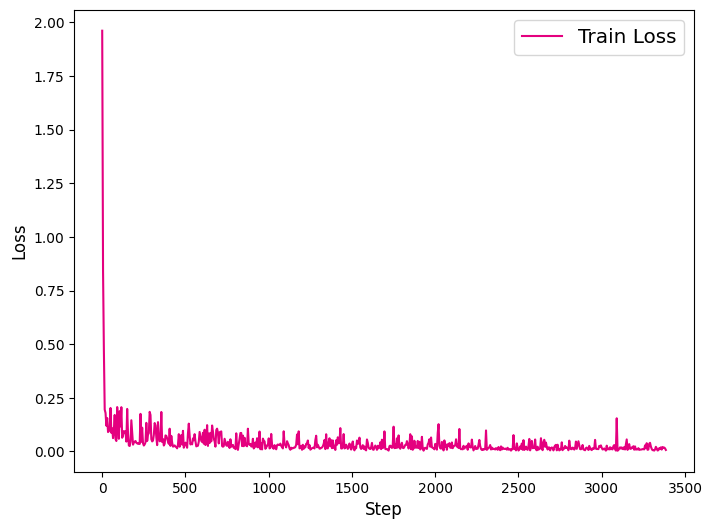

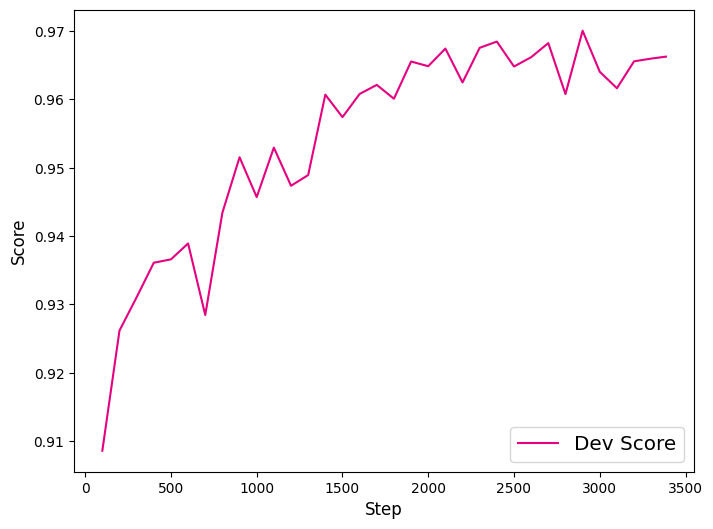

In [21]:
import matplotlib.pyplot as plt

def plot_training_loss(train_loss_record, fig_name, fig_size=(8, 6), sample_step=10, loss_legend_loc="lower left"):
    """
    绘制损失变化图

    输入:
        - train_loss_record: 训练过程中的损失记录
        - fig_name: 图片保存路径
        - fig_size: 设置图像尺寸
        - sample_step: 每隔sample_step会采样一个损失点，用以绘制图像
        - loss_legend_loc: 图例说明的位置
    """
    plt.figure(figsize=fig_size)

    train_steps = [x[0] for x in train_loss_record][::sample_step]
    train_losses = [x[1] for x in train_loss_record][::sample_step]

    plt.plot(train_steps, train_losses, color='#e4007f', label="Train Loss")
    # 绘制坐标轴和图例
    plt.ylabel("Loss", fontsize='large')
    plt.xlabel("Step", fontsize='large')
    plt.legend(loc=loss_legend_loc, fontsize='x-large')

    plt.savefig(fig_name)
    plt.show()

def plot_training_acc(train_score_record, fig_name, fig_size=(8, 6), sample_step=10, acc_legend_loc="lower left"):
    """
    绘制评估分数变化图

    输入:
        - train_score_record: 训练过程中的评估分数记录
        - fig_name: 图片保存路径
        - fig_size: 设置图像尺寸
        - sample_step: 每隔sample_step会采样一个损失点，用以绘制图像
        - acc_legend_loc: 图例说明的位置
    """
    plt.figure(figsize=fig_size)

    train_steps=[x[0] for x in train_score_record]
    train_losses = [x[1] for x in train_score_record]

    plt.plot(train_steps, train_losses, color='#e4007f', label="Dev Score")
    # 绘制坐标轴和图例
    plt.ylabel("Score", fontsize='large')
    plt.xlabel("Step", fontsize='large')
    plt.legend(loc=acc_legend_loc, fontsize='x-large')

    plt.savefig(fig_name)
    plt.show()

fig_path = "./images/chapter6_loss1.pdf"
plot_training_loss(train_loss_record, fig_path, loss_legend_loc="upper right", sample_step=5)

fig_path = "./images/chapter6_acc1.pdf"
plot_training_acc(train_score_record, fig_path, sample_step=1, acc_legend_loc="lower right")

In [22]:
# 加载训练好的模型进行预测，重新实例化一个模型，然后将训练好的模型参数加载到新模型里面
saved_state = paddle.load("./checkpoints/best.pdparams")
model = AutoModelForTokenClassification.from_pretrained(model_name, num_classes=5)
model.load_dict(saved_state)

# 评估模型
precision, recall, F1 = evaluate(model, test_loader, metric)
print(f"[Evaluate]  precision: {precision: .5f}, recall: {recall: .5f}, dev score: {F1:.5f}") 
             

[2025-03-31 22:02:18,859] [    INFO] - We are using <class 'paddlenlp.transformers.bert.modeling.BertForTokenClassification'> to load 'bert-base-chinese'.
[2025-03-31 22:02:18,863] [    INFO] - Loading weights file from cache at /root/.paddlenlp/models/bert-base-chinese/model_state.pdparams
[2025-03-31 22:02:19,286] [    INFO] - Loaded weights file from disk, setting weights to model.
[2025-03-31 22:02:19,597] [ WARNING] - Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForTokenClassification: ['cls.predictions.decoder_bias', 'cls.predictions.decoder_weight', 'cls.predictions.layer_norm.bias', 'cls.predictions.layer_norm.weight', 'cls.predictions.transform.bias', 'cls.predictions.transform.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequ

[Evaluate]  precision:  0.96616, recall:  0.95839, dev score: 0.96226


In [23]:
from seqeval.metrics.sequence_labeling import get_entities

def parsing_label_sequence(tokens, label_sequence):
    """
    根据预测的标记序列获取对应的分词序列

    输入:
        - tokens: 使用tokenize处理后的token序列
        - label_sequence: 预测的词位标记序列
    """
    prev = 0
    words = []
    items = get_entities(label_sequence, suffix=False)
    for name, start, end in items:
        if prev != start:
            words.extend(tokens[prev:start])
        words.append("".join(tokens[start:end+1]))
        prev = end + 1
    
    return words

def infer(model, text, tokenizer, id2label):
    """
    模型预测函数

    输入:
        - model: 用以中文分词预测的模型实例
        - text: 输入的待分词文本
        - tokenizer: Bert的tokenizer实例
        - id2label: 用以将词位标记序号转为label的词典
    """

    model.eval()
    # 数据处理
    encoded_inputs = tokenizer(text, max_seq_len=max_seq_len)

    # 构造输入模型的数据
    input_ids = paddle.to_tensor(encoded_inputs["input_ids"], dtype="int64").unsqueeze(0)
    token_type_ids = paddle.to_tensor(encoded_inputs["token_type_ids"], dtype="int64").unsqueeze(0)

    # 计算发射分数
    logits = model(input_ids=input_ids, token_type_ids=token_type_ids)
    predictions = logits.argmax(axis=-1).tolist()[0]
    label_sequence = [id2label[label_id] for label_id in predictions[1:-1]]

    # 解析出分数最大的标签
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0].tolist()[1:-1])
    words = parsing_label_sequence(tokens, label_sequence)

    print("tokenize sequence:", " | ".join(words))
text = "派出所民警在重点乡镇企业进行流动人口登记"
id2label = {v:k for k, v in label2id.items()}
infer(model, text, tokenizer, id2label)

tokenize sequence: 派出所 | 民警 | 在 | 重点 | 乡镇企业 | 进行 | 流动 | 人口 | 登记


/root/miniconda3/envs/bert/lib/python3.9/site-packages/paddlenlp/transformers/tokenizer_utils_base.py:2327: FutureWarning: The `max_seq_len` argument is deprecated and will be removed in a future version, please use `max_length` instead.
  warnings.warn(
